In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [14]:
df = pd.read_csv("imdb_top_1000.csv")
df.head()


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [15]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [16]:
# Remove duplicate rows
df = df.drop_duplicates()

# Remove rows where IMDB_Rating is missing
df = df.dropna(subset=['IMDB_Rating'])

# Convert rating to numeric
df['IMDB_Rating'] = pd.to_numeric(df['IMDB_Rating'], errors='coerce')

# Remove rows where conversion failed
df = df.dropna(subset=['IMDB_Rating'])

df.isnull().sum()


Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [17]:
mean_rating = df['IMDB_Rating'].mean()
median_rating = df['IMDB_Rating'].median()
mode_rating = df['IMDB_Rating'].mode()[0]

print("Average (Mean) Rating:", round(mean_rating, 2))
print("Median Rating:", median_rating)
print("Most Common (Mode) Rating:", mode_rating)


Average (Mean) Rating: 7.95
Median Rating: 7.9
Most Common (Mode) Rating: 7.7


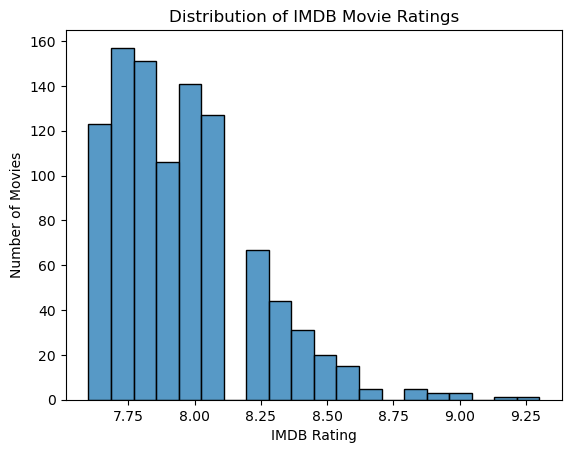

In [18]:
plt.figure()
sns.histplot(df['IMDB_Rating'], bins=20)
plt.title("Distribution of IMDB Movie Ratings")
plt.xlabel("IMDB Rating")
plt.ylabel("Number of Movies")
plt.show()


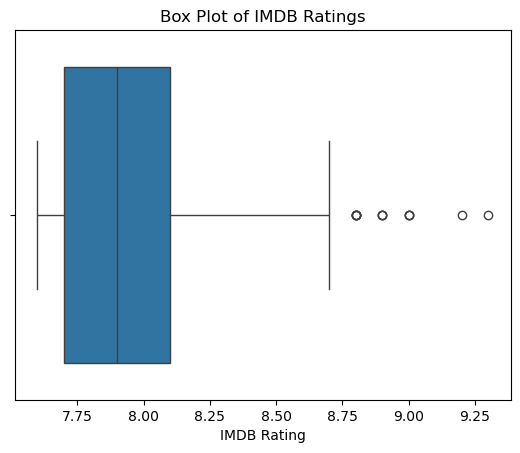

In [19]:
plt.figure()
sns.boxplot(x=df['IMDB_Rating'])
plt.title("Box Plot of IMDB Ratings")
plt.xlabel("IMDB Rating")
plt.show()


In [20]:
top_movies = df.sort_values(by='IMDB_Rating', ascending=False).head(10)

top_movies[['Series_Title', 'IMDB_Rating']]


,Series_Title,IMDB_Rating
0,The Shawshank Redemption,9.3
1,The Godfather,9.2
4,12 Angry Men,9.0
2,The Dark Knight,9.0
3,The Godfather: Part II,9.0
5,The Lord of the Rings: The Return of the King,8.9
7,Schindler's List,8.9
6,Pulp Fiction,8.9
8,Inception,8.8
12,"Il buono, il brutto, il cattivo",8.8


In [21]:
# Split multiple genres into separate rows
df_genre = df.copy()
df_genre['Genre'] = df_genre['Genre'].str.split(', ')
df_genre = df_genre.explode('Genre')

# Calculate average rating per genre
top_genres = df_genre.groupby('Genre')['IMDB_Rating'].mean().sort_values(ascending=False)

top_genres.head(10)


Genre
War          8.013725
Western      8.000000
Film-Noir    7.989474
Sci-Fi       7.977612
Mystery      7.967677
Drama        7.959392
Crime        7.954545
History      7.953571
Adventure    7.952041
Action       7.948677
Name: IMDB_Rating, dtype: float64

In [22]:
df.to_csv("cleaned_movie_ratings.csv", index=False)
print("Cleaned dataset saved successfully")


Cleaned dataset saved successfully


In [23]:
print("Total movies analyzed:", len(df))


Total movies analyzed: 1000
